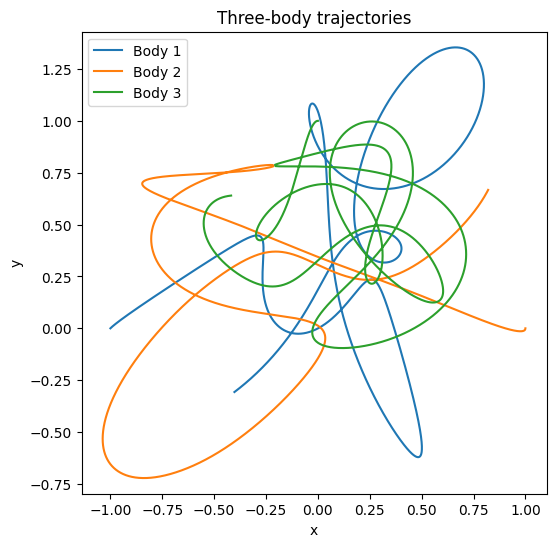

<class 'scipy.integrate._ivp.ivp.OdeResult'>
(3, 10000) <class 'numpy.ndarray'>


In [1]:
from data_creation import get_trajectories
%load_ext autoreload
%autoreload 2

sol = get_trajectories()

x,y,vx,vy,t = sol

print(x.shape, type(y))
# print((x1.shape), type(y1))

In [2]:
import numpy as np


# Applied sigmoid but does not seem to do much
# We can first try without sigmoid


# custom function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


# define vectorized sigmoid
sigmoid_v = np.vectorize(sigmoid)

# # test
x_sig = sigmoid(x)  
y_sig = sigmoid(y)
vx_sig = sigmoid(vx)
vy_sig = sigmoid(vy)


print(min(vx_sig[0]))
print(min(vy_sig[0]))



0.1560552232688204
0.0031827263277546536


In [3]:
import numpy as np
import pandas as pd

data = np.vstack((x, y, vx, vy)).T

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [5]:


# prev = np.roll(data, shift=1, axis=0)  # previous row values
# prev[0] = np.nan   # first row has no previous row
# print(prev.shape)

# lagged = np.hstack([data, prev])

print(data.shape)

# # Create lagged features
X = data[:-1]
y = data[1:]

print(X.shape, y.shape)

# # Split the data into training and test sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# # Reshape the input data to 3D for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))



(10000, 12)
(9999, 12) (9999, 12)


In [6]:


# model = Sequential([
#     LSTM(10, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dense(12)
# ])

# model.compile(optimizer='adam', loss='mse')

# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# loss = model.evaluate(X_test, y_test)
# print(f'Test loss: {loss}')


# y_pred = model.predict(X_test)


In [7]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Model training history')
# plt.legend()
# plt.show()


In [8]:
# from sklearn.metrics import r2_score, mean_absolute_error

# def smape(y_true, y_pred):
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
#     diff = np.abs(y_true - y_pred) / denominator
#     diff[denominator == 0] = 0.0  # avoid division by zero
#     return 100 * np.mean(diff)  

# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)


# score = smape(y_test, y_pred)
# print(f"SMAPE: {score:.2f}%")

# print(f"Test MAE: {mae:.4f}")
# print(f"Test R²: {r2:.4f}")

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


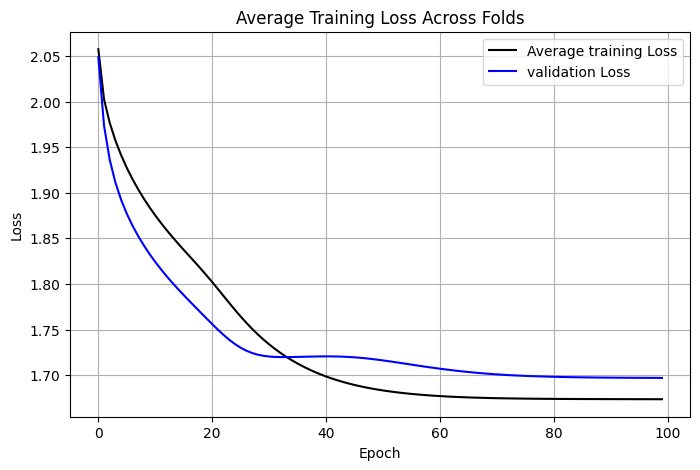

In [79]:
from LSTMCell import LSTM
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class PowerLoss(nn.Module):
    def __init__(self, p=4):
        super().__init__()
        self.p = p

    def forward(self, y_pred, y_true):
        return torch.mean(torch.abs(y_pred - y_true) ** self.p)

input_window_size = 12
hidden_size = 2
num_layers = 20

model = LSTM(input_window_size, hidden_size, num_layers)

criterion = PowerLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

losses, val_loss = model.training_loop_cv(num_epochs = 100, 
                    criterion = criterion,
                    optimizer = optimizer,
                    trainX = X_train,
                    trainY = y_train)

losses_array = np.array(losses)        # shape: (num_folds, num_epochs)
avg_loss = np.mean(losses_array, axis=0)

losses_array = np.array(val_loss)        # shape: (num_folds, num_epochs)
avg_val_loss = np.mean(losses_array, axis=0)

plt.figure(figsize=(8, 5))
plt.plot(avg_loss, color='black', label='Average training Loss')
plt.plot(avg_val_loss, color='blue', label='validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Average Training Loss Across Folds')
plt.grid(True)
plt.legend()
plt.show()

Generate time series from 1 input and plot both in one plot

True
[ 0.48508155 -1.0123245   0.5272429   1.2708856  -0.39883783  0.12795228
 -0.43404534  0.15379457  0.2802508  -0.37922564  0.4494091  -0.07018345]
[[ 0.48508154 -1.01232443  0.52724288  1.27088557 -0.39883785  0.12795228
  -0.43404536  0.15379458  0.28025078 -0.37922564  0.4494091  -0.07018345]]


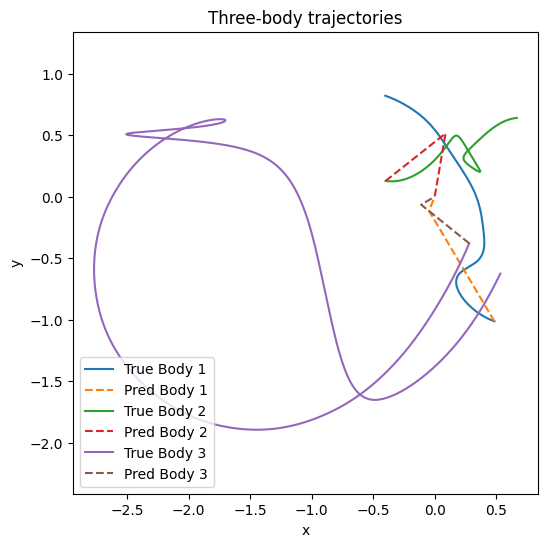

In [ ]:
from data_creation import plot_trajectories
steps = 2000
output = model.generate_timeseries(X_test[0], steps=steps)

plot_trajectories(X_test[0:steps].squeeze(1), output)